In [1]:
import os
from datasets import load_dataset
import datasets
from datasets import Value, Sequence
import sys
import math
import transformers
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np
from utils import cache_dir, change_name, set_global_path, rank, get_results_per_task, get_model_avg, draw_avg_line

plt.rcParams.update({
    "font.size": 14,       
    "axes.labelsize": 16,  
    "axes.titlesize": 18,  
    "legend.fontsize": 18, 
    "lines.linewidth": 2   
})

/users/PDS0352/wyang107/miniconda3/envs/lceg2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /users/PDS0352/wyang107/.cache/huggingface/token
Login successful


In [3]:
paths = {
        'llama-3.1-8B':'llama-3.1-8B-Instruct',
        'llama-3.1-70B': 'llama-3.1-70B-Instruct' ,
         'llama-3.2-1B':'llama-3.2-1B-Instruct',
        'llama-3.2-3B':'llama-3.2-3B-Instruct',
        'phi-3-128k-mini1':'phi-3-mini-128k-instruct',
        'phi-3-128k-medium2':'phi-3-medium-128k-instruct',
         'Qwen2.5-7B':'Qwen2.5-7B-Instruct',
         'Qwen2.5-14B':'Qwen2.5-14B-Instruct',
         }
results = dict()
for k,p in paths.items():
    results[k] = json.load(open(os.path.join(set_global_path('./preds/pred_open_model') ,p,'result.json'), 'r'))

## ranking on 100-longbench

In [3]:
lengths = [0, 8, 16, 32, 64, 128]
draw_tasks = get_results_per_task(results, lengths=lengths)
print(draw_tasks)

defaultdict(<class 'dict'>, {'counting_stars': {'llama-3.1-8B': [(0, 60.61), (128, 38.0), (16, 56.0), (32, 53.0), (64, 55.0), (8, 50.0)], 'llama-3.1-70B': [(0, 84.85), (128, 30.0), (16, 71.0), (32, 64.0), (64, 48.0), (8, 73.0)], 'llama-3.2-1B': [(0, 40.4), (128, 17.0), (16, 33.0), (32, 31.0), (64, 24.0), (8, 24.0)], 'llama-3.2-3B': [(0, 46.46), (128, 38.0), (16, 38.0), (32, 31.0), (64, 36.0), (8, 35.0)], 'phi-3-128k-mini1': [(0, 52.53), (128, 38.0), (16, 53.0), (32, 46.0), (64, 39.0), (8, 40.0)], 'phi-3-128k-medium2': [(0, 63.64), (128, 38.0), (16, 48.0), (32, 46.0), (64, 48.0), (8, 49.0)], 'Qwen2.5-7B': [(128, 33.0), (16, 71.0), (32, 72.0), (64, 56.0), (8, 71.0), (0, 87.88)], 'Qwen2.5-14B': [(0, 87.88), (128, 55.0), (16, 75.0), (32, 74.0), (64, 62.0), (8, 73.0)]}, 'kv_retrieval': {'llama-3.1-8B': [(0, 58.59), (128, 71.0), (16, 56.0), (32, 67.0), (64, 75.0), (8, 61.0)], 'llama-3.1-70B': [(0, 75.76), (128, 70.0), (16, 66.0), (32, 74.0), (64, 76.0), (8, 72.0)], 'llama-3.2-1B': [(0, 58.59

#### each task‘s ranking

In [4]:
for task in draw_tasks.keys():
    print(f"==============================  {task}  ==============================\n")
    original_performances, new_performances = rank(draw_tasks[task], all_steps=lengths)
    print("======================================================================\n")

==============================  counting_stars  ==============================

original_metrics
                      0     8     16    32    64    128  -1  
llama-3.1-8B        60.61  50.0  56.0  53.0  55.0  38.0  50.4
llama-3.1-70B       84.85  73.0  71.0  64.0  48.0  30.0  57.2
llama-3.2-1B        40.40  24.0  33.0  31.0  24.0  17.0  25.8
llama-3.2-3B        46.46  35.0  38.0  31.0  36.0  38.0  35.6
phi-3-128k-mini1    52.53  40.0  53.0  46.0  39.0  38.0  43.2
phi-3-128k-medium2  63.64  49.0  48.0  46.0  48.0  38.0  45.8
Qwen2.5-7B          87.88  71.0  71.0  72.0  56.0  33.0  60.6
Qwen2.5-14B         87.88  73.0  75.0  74.0  62.0  55.0  67.8


original_ranking
                     0     8     16    32    64    128  -1  
llama-3.1-8B           5     4     4     4     3     2     4
llama-3.1-70B          3     1     2     3     4     7     3
llama-3.2-1B           8     8     8     7     8     8     8
llama-3.2-3B           7     7     7     7     7     2     7
phi-3-128k-mini1     

#### average results

In [5]:
model_average_results = get_model_avg(draw_tasks, lengths=lengths)
print(f"==============================  avg  ==============================\n")
original_performances, new_performances = rank(model_average_results, all_steps=lengths)
print(f"===================================================================\n")

==============================  avg  ==============================

original_metrics
                         0         8         16        32        64   \
llama-3.1-8B        44.06500  36.64625  35.48000  36.29000  38.76250   
llama-3.1-70B       67.52375  65.15625  60.33000  54.72875  49.50125   
llama-3.2-1B        28.75250  25.94250  21.67625  20.21125  18.70250   
llama-3.2-3B        51.23375  41.92250  39.65375  35.54250  31.31750   
phi-3-128k-mini1    48.29250  42.41125  43.84125  37.96375  34.58375   
phi-3-128k-medium2  57.43750  50.87250  47.33875  47.54125  42.51500   
Qwen2.5-7B          57.42625  50.43375  46.71500  45.95750  36.93875   
Qwen2.5-14B         59.19750  51.42625  48.59375  43.01125  37.47625   

                         128   -1    
llama-3.1-8B        34.68375  36.37  
llama-3.1-70B       33.03375  52.55  
llama-3.2-1B        15.70625  20.45  
llama-3.2-3B        25.60500  34.81  
phi-3-128k-mini1    25.07750  36.78  
phi-3-128k-medium2  28.12750  43.28  

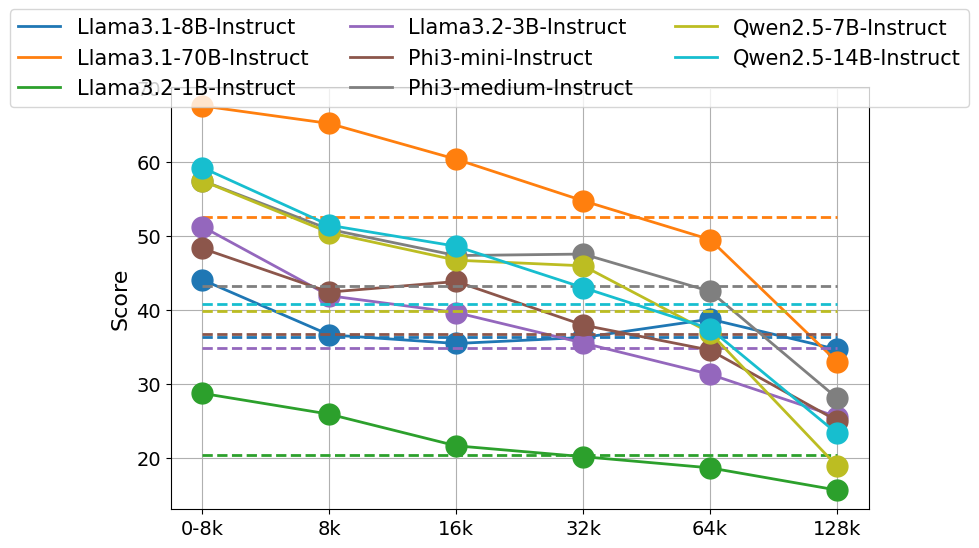

In [6]:
draw_avg_line(original_performances, lengths)

## show results

In [7]:
lengths = [0, 8, 16, 32, 64, 128, 256]
draw_tasks = defaultdict(dict)
for model in results.keys():
    draw_things = defaultdict(list)
    for dataset,score in results[model].items():
        name = dataset.split('_')
        name, x = '_'.join(name[:-1]), int(name[-1])
        draw_things[name].append((x, score))
    draw_things = {key: draw_things[key] for key in sorted(draw_things)}
    for dataset, scores in draw_things.items():
        scores = sorted(scores, key=lambda x: x[0])
        scores = [(s[0],(s[-1]-scores[0][-1])/scores[0][-1]*100) for s in scores]+ [scores[0]]
        # print(model, dataset, scores)
        draw_tasks[dataset][model] = scores
# print(draw_tasks)

In [8]:
num_datasets, num_models, num_steps = len(draw_tasks), len(paths.keys()), len(lengths)-1
data = [np.random.rand(num_models, num_steps) * np.nan for _ in range(num_datasets)]
datasets, models, steps = [], [], []
for d_i, (dataset, model_p) in enumerate(draw_tasks.items()):
    datasets.append(dataset)
    models = []
    for m_i, (model, performances) in enumerate(model_p.items()):
        models.append(model)
        steps = []
        for p_i, p in enumerate(performances[1:-1]):
            steps.append(f'{p[0]}k')
            if p[1] < 40:
                data[d_i][m_i, p_i] = p[1]

In [9]:
def draw_matrix(save=False):
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns

    # Create a color map that includes NaN values
    cmap = sns.color_palette("Greens", as_cmap=True)
    # Add an additional color for NaN (shading the NaN region)
    cmap.set_bad(color='lightgray')  # Set NaN regions to light gray

    fig, axes = plt.subplots(2, 4, figsize=(32, 11), sharex=True, sharey=True)
    axes = axes.flatten()

    for ax, dataset, performance in zip(axes, datasets, data):
        mask = np.isnan(performance)
        sns.heatmap(
            performance,
            annot=True,  
            fmt=".2f",  
            cmap=cmap,  
            cbar=True,  
            cbar_kws={"shrink": 0.75}, 
            mask=mask, 
            xticklabels=steps, 
            yticklabels=models, 
            ax=ax
        )
        ax.set_title(change_name(dataset), fontsize=16, fontweight='bold')

    plt.tight_layout(rect=[0, 0, 0.9, 1]) 
    if save : plt.savefig("results2.pdf", format="pdf", dpi=600, bbox_inches="tight")
    plt.show()

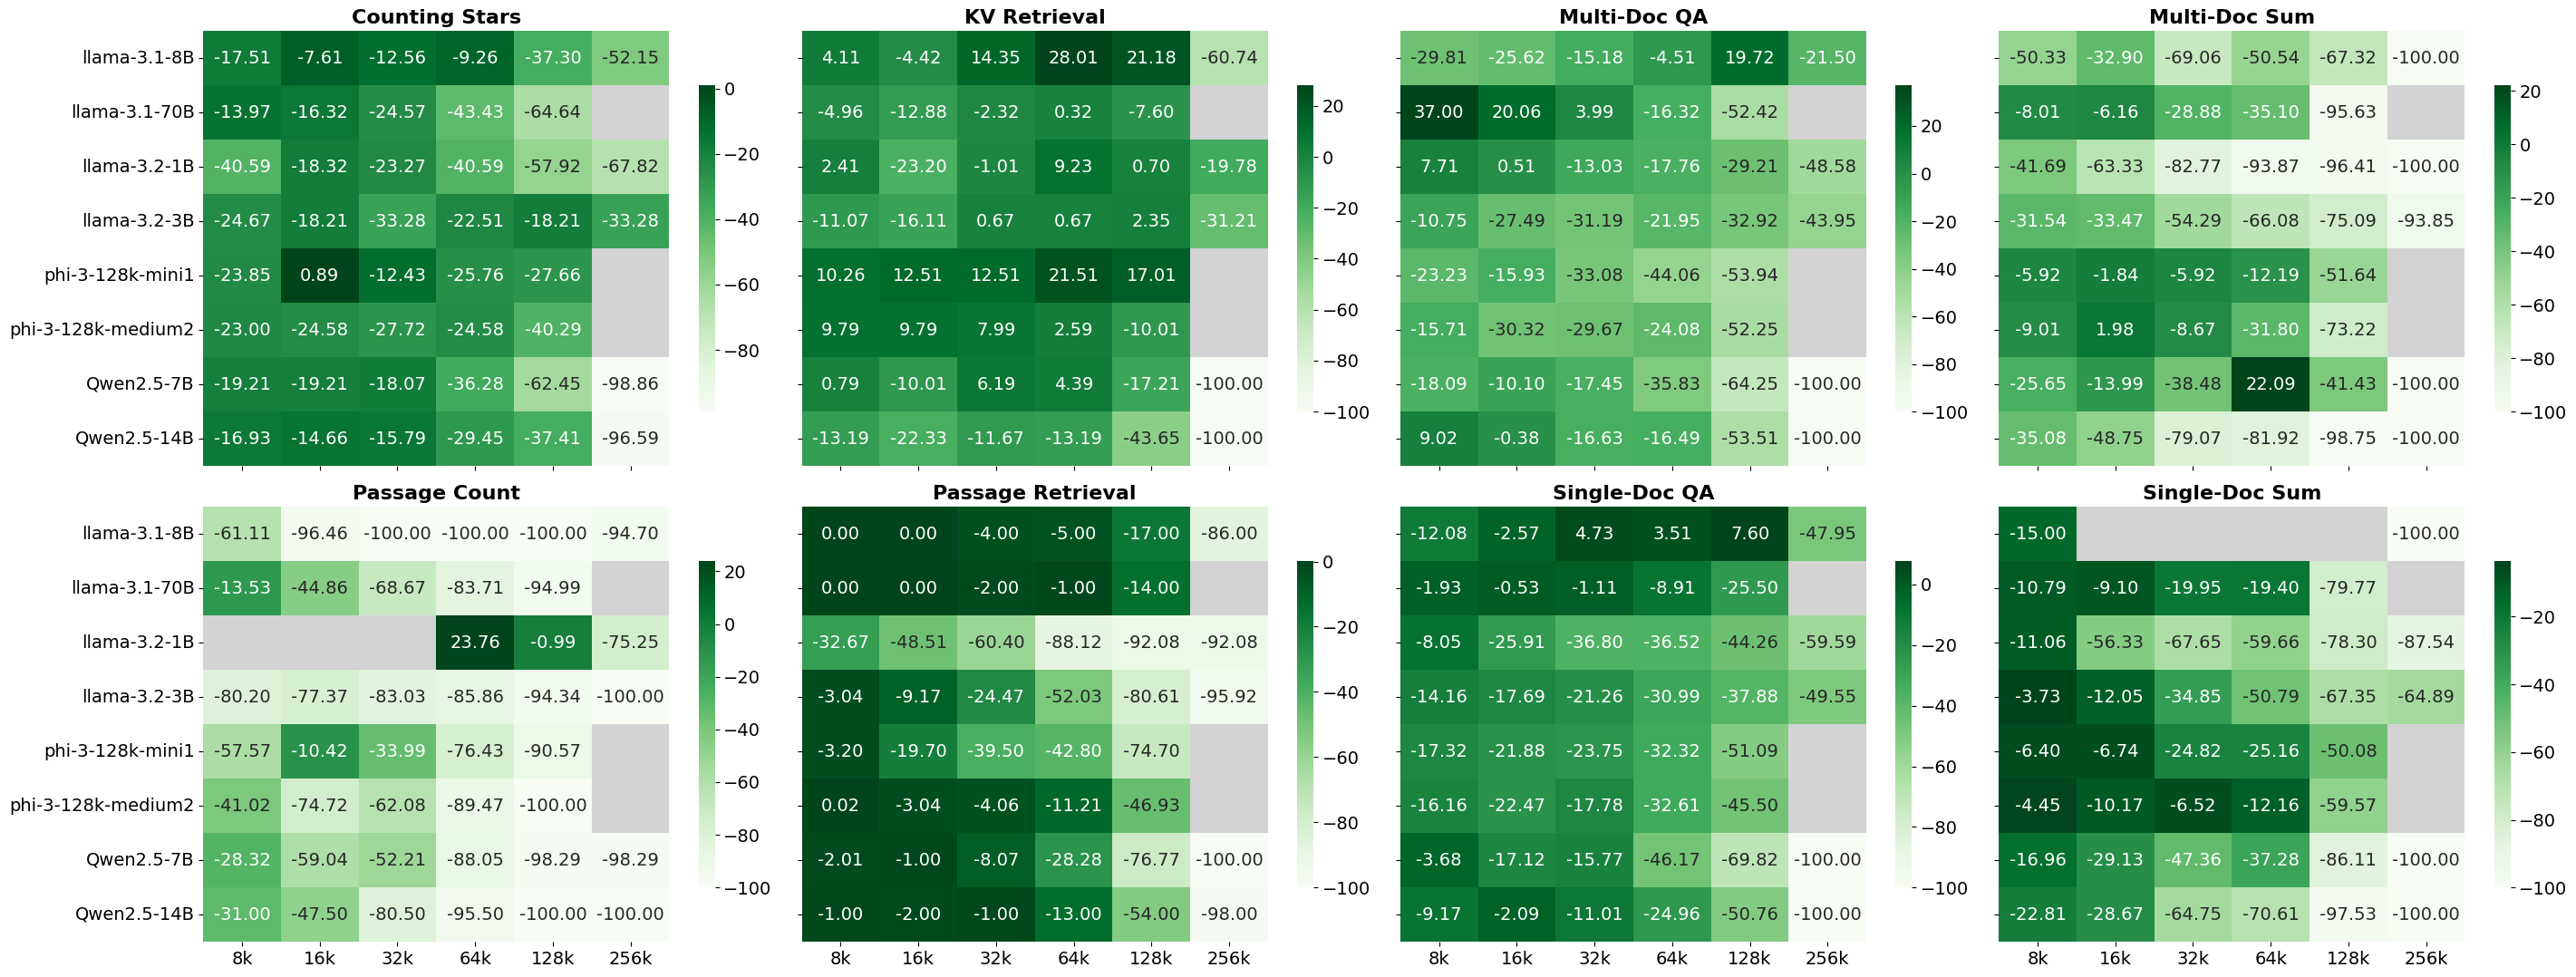

In [10]:
draw_matrix()

In [11]:
def draw_lines(save=False):
    k, x_t = None, None
    markers = ['o', 's', 'D', '^', 'v', 'P', '*', 'X'] # ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']
    fig, axes = plt.subplots(2, 4, figsize=(30, 8),  dpi=300)
    for a_i, (ax, task) in enumerate(zip(axes.flatten() ,draw_tasks.keys())):
        v = [v[-1][-1] for v in draw_tasks[task].values()]
        norm = mcolors.Normalize(vmin=min(map(np.min, v))-10, vmax=max(map(np.max, v)))
        colormap = cm.Reds
        for m_i, (model, scores) in enumerate(draw_tasks[task].items()):
            scores, baseline = scores[:-1], scores[-1]
            color = colormap(norm(baseline[-1]))
            scores = sorted(scores, key=lambda x: x[0])
            x, y = [i for i, s_i in enumerate(scores)], [s_i[1] for s_i in scores]
            if k is None or x_t is None or len(k) < len(y):
                x_t = x
                k = ['0-8k']+[f'{s_i[0]}k' for s_i in scores[1:]]
            if max(y) > 100: continue
            ax.plot(
                x, y,
                color=color,
                # marker=markers[m_i],
                markevery=[-1], 
                linewidth=2,
                alpha=0.8
            )
            ax.scatter(x, y, color=color, marker=markers[m_i], s=200,
                label=change_name(model) if task==list(draw_tasks.keys())[0] else "", 
                )
        ax.set_xlabel(change_name(task), fontweight='bold', fontsize=14,)
        if a_i % 4 == 0: ax.set_ylabel("Long-Text Capacity")
        ax.set_xticks(x_t, k)
        ax.grid(True, linestyle='--', linewidth=0.4)

        sm = cm.ScalarMappable(cmap=colormap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
        cbar.ax.tick_params(labelsize=10)

    handles, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=8, fontsize=17, bbox_to_anchor=(0.49, 0.96))


    plt.tight_layout()
    plt.subplots_adjust(top=0.88)  
    if save: plt.savefig("results.pdf", format="pdf", dpi=600, bbox_inches="tight")
    plt.show()

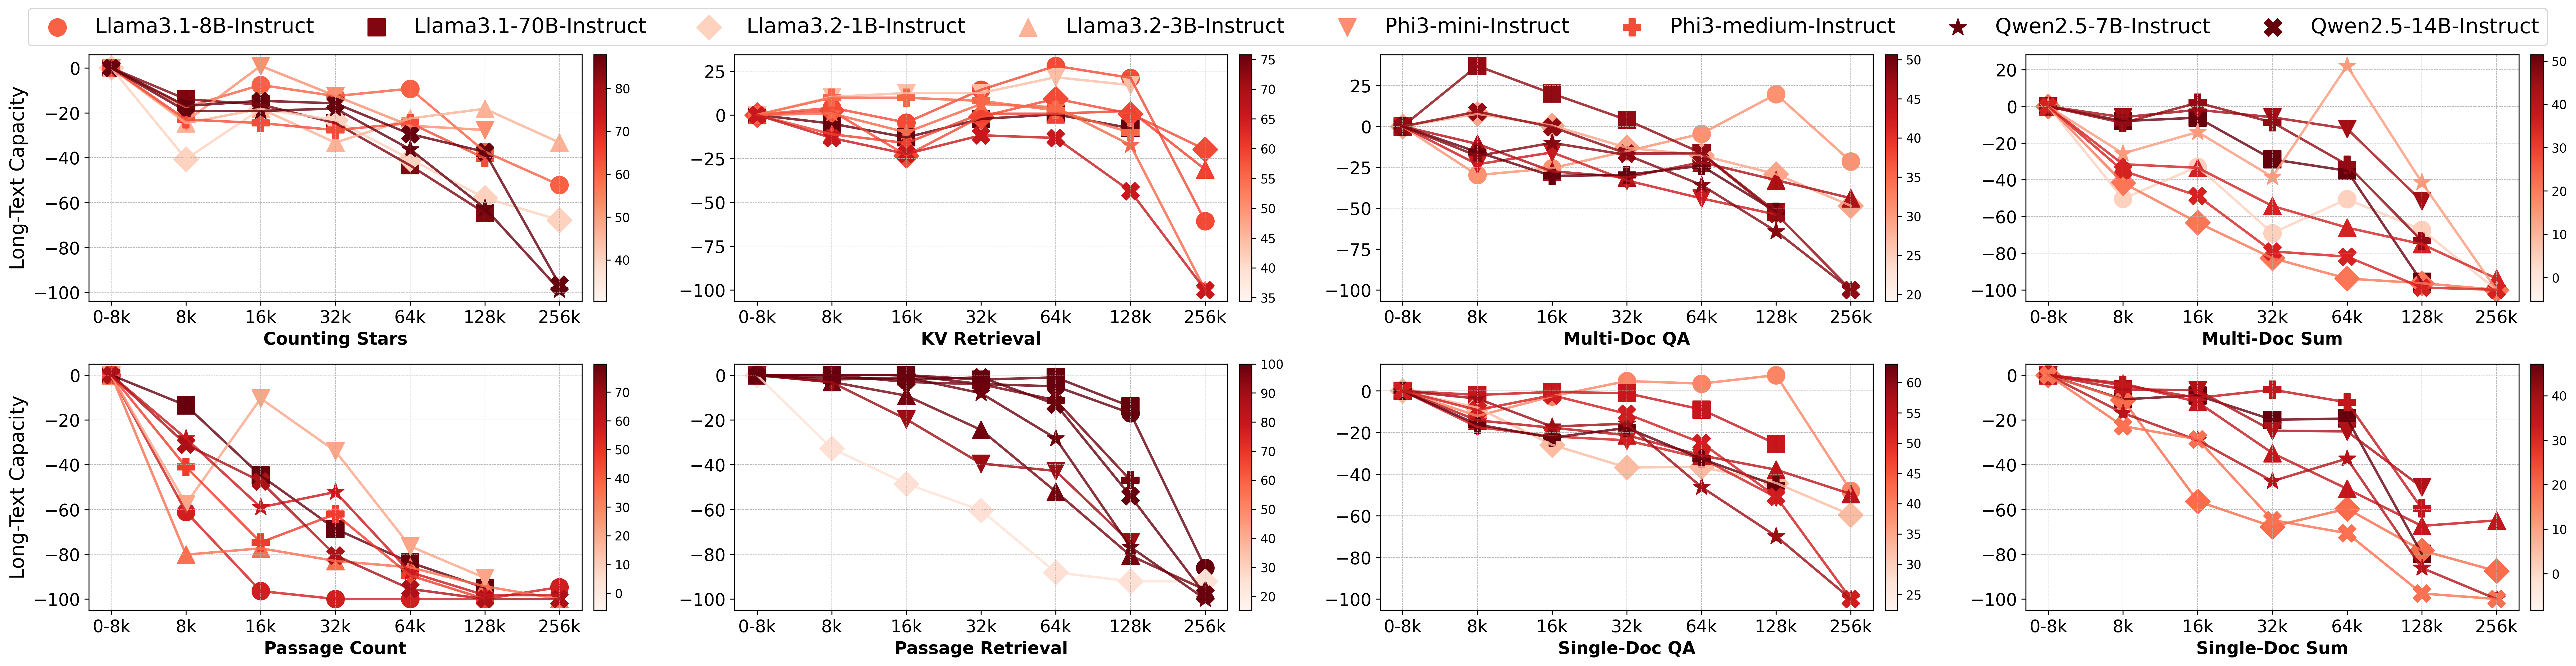

In [12]:
draw_lines()

In [13]:
lengths = [0, 8, 16, 32, 64, 128]
draw_tasks = get_results_per_task(results, lengths=lengths)
print(draw_tasks)

defaultdict(<class 'dict'>, {'counting_stars': {'llama-3.1-8B': [(0, 60.61), (128, 38.0), (16, 56.0), (32, 53.0), (64, 55.0), (8, 50.0)], 'llama-3.1-70B': [(0, 84.85), (128, 30.0), (16, 71.0), (32, 64.0), (64, 48.0), (8, 73.0)], 'llama-3.2-1B': [(0, 40.4), (128, 17.0), (16, 33.0), (32, 31.0), (64, 24.0), (8, 24.0)], 'llama-3.2-3B': [(0, 46.46), (128, 38.0), (16, 38.0), (32, 31.0), (64, 36.0), (8, 35.0)], 'phi-3-128k-mini1': [(0, 52.53), (128, 38.0), (16, 53.0), (32, 46.0), (64, 39.0), (8, 40.0)], 'phi-3-128k-medium2': [(0, 63.64), (128, 38.0), (16, 48.0), (32, 46.0), (64, 48.0), (8, 49.0)], 'Qwen2.5-7B': [(128, 33.0), (16, 71.0), (32, 72.0), (64, 56.0), (8, 71.0), (0, 87.88)], 'Qwen2.5-14B': [(0, 87.88), (128, 55.0), (16, 75.0), (32, 74.0), (64, 62.0), (8, 73.0)]}, 'kv_retrieval': {'llama-3.1-8B': [(0, 58.59), (128, 71.0), (16, 56.0), (32, 67.0), (64, 75.0), (8, 61.0)], 'llama-3.1-70B': [(0, 75.76), (128, 70.0), (16, 66.0), (32, 74.0), (64, 76.0), (8, 72.0)], 'llama-3.2-1B': [(0, 58.59

In [14]:
task_data = {'Base Ability': {model:[] for model in paths.keys()}, 
             'Average Score': {model:[] for model in paths.keys()}, 
             'Average LongScore': {model:[] for model in paths.keys()}}
tasks = []
for task in draw_tasks.keys():
    if task not in tasks: tasks.append(task)
    original_performances, new_performances = rank(draw_tasks[task], all_steps=lengths, show=False)
    print(task,original_performances, new_performances )
    for model, scores in original_performances.items():
        task_data['Base Ability'][model].append(scores[0])
        task_data['Average Score'][model].append(scores[-1])
        p = new_performances[model][-1]
        if p > 50: task_data['Average LongScore'][model].append(0)
        else: task_data['Average LongScore'][model].append(p)

counting_stars {'llama-3.1-8B': [60.61, 50.0, 56.0, 53.0, 55.0, 38.0, 50.4], 'llama-3.1-70B': [84.85, 73.0, 71.0, 64.0, 48.0, 30.0, 57.2], 'llama-3.2-1B': [40.4, 24.0, 33.0, 31.0, 24.0, 17.0, 25.8], 'llama-3.2-3B': [46.46, 35.0, 38.0, 31.0, 36.0, 38.0, 35.6], 'phi-3-128k-mini1': [52.53, 40.0, 53.0, 46.0, 39.0, 38.0, 43.2], 'phi-3-128k-medium2': [63.64, 49.0, 48.0, 46.0, 48.0, 38.0, 45.8], 'Qwen2.5-7B': [87.88, 71.0, 71.0, 72.0, 56.0, 33.0, 60.6], 'Qwen2.5-14B': [87.88, 73.0, 75.0, 74.0, 62.0, 55.0, 67.8]} {'llama-3.1-8B': [0.0, -17.51, -7.61, -12.56, -9.26, -37.3, -16.85], 'llama-3.1-70B': [0.0, -13.97, -16.32, -24.57, -43.43, -64.64, -32.59], 'llama-3.2-1B': [0.0, -40.59, -18.32, -23.27, -40.59, -57.92, -36.14], 'llama-3.2-3B': [0.0, -24.67, -18.21, -33.28, -22.51, -18.21, -23.38], 'phi-3-128k-mini1': [0.0, -23.85, 0.89, -12.43, -25.76, -27.66, -17.76], 'phi-3-128k-medium2': [0.0, -23.0, -24.58, -27.72, -24.58, -40.29, -28.03], 'Qwen2.5-7B': [0.0, -19.21, -19.21, -18.07, -36.28, -62.4

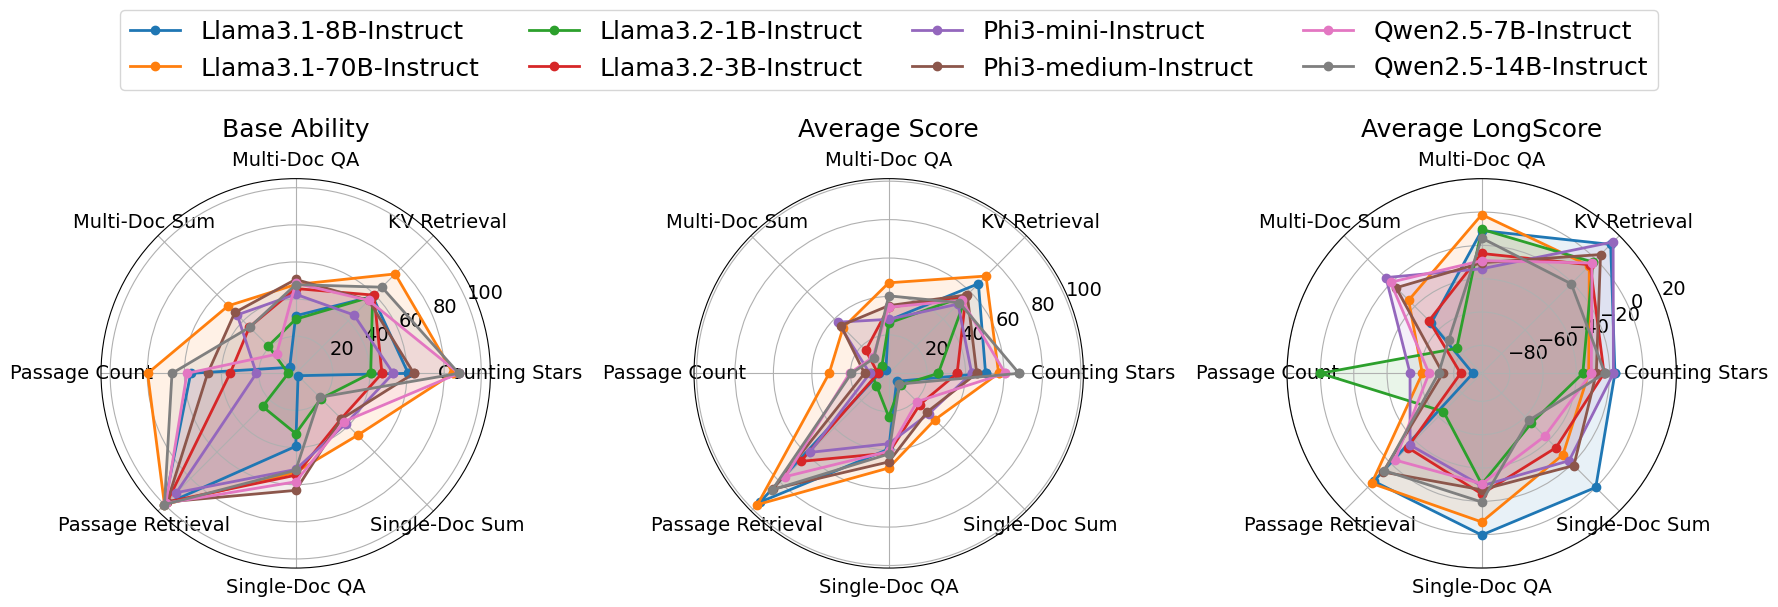

In [15]:
import matplotlib.pyplot as plt
import numpy as np


angles = np.linspace(0, 2 * np.pi, len(tasks), endpoint=False).tolist()
angles += angles[:1] 

fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': 'polar'})

for i, (task, models) in enumerate(task_data.items()):
    ax = axs[i]
    for model, scores in models.items():
        adjusted_scores = scores + scores[:1]
        ax.plot(angles, adjusted_scores, label=change_name(model) if i == 0 else "", marker='o')
        ax.fill(angles, adjusted_scores, alpha=0.1)

    ax.set_title(task, va='bottom')
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([f"{change_name(task)}" for task in tasks])

fig.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.1), 
    ncol=len(paths.keys())/2, 
    fontsize=18
)

plt.tight_layout()
plt.show()